In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Import necessary libraries <a class="anchor" id="2"></a>



In [ ]:
 

import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout,Flatten
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pickle
from PIL import Image
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import pickle
import os
import torch.nn.functional as F
import requests
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import pandas as pd
torch.manual_seed(1)
from sklearn import preprocessing
from torch.utils.data import DataLoader, Dataset, Subset






# 2.Importing dataset <a class="anchor" id="3"></a>




In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape)) 
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


# 3. Data visualization <a class="anchor" id="4"></a>




- The following code will help to sample the 25 random MNIST digits and visualize them.

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


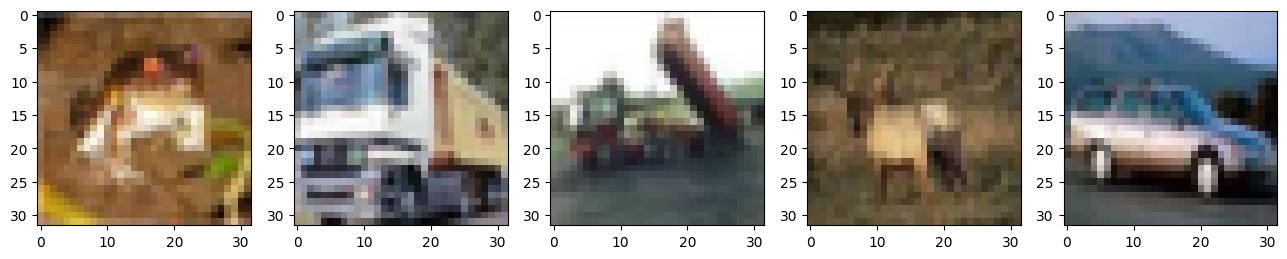

In [ ]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = x_train[i]
    axarr[i].imshow(img)
plt.show()

# 4. Designing model architecture using Keras <a class="anchor" id="5"></a>


- The following code shows how to design the MLP model architecture using Keras.

- The first step in designing the model architecture is to import the Keras layers. This can be done as follows:




## 4.1 Import Keras layers <a class="anchor" id="5.1"></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

## 4.2 Compute the number of labels <a class="anchor" id="5.2"></a>

- Now, the data must be in the correct shape and format. 

- After loading the MNIST dataset, the number of labels is computed as:

In [ ]:
# compute the number of labels
num_labels = 10
print(num_labels)

10


## 4.3 One-Hot Encoding <a class="anchor" id="5.3"></a>

- At this point, the labels are in digits format, 0 to 9. 

- This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class. 

- A more suitable format is called a one-hot vector, a 10-dim vector with all elements 0, except for the index of the digit class. 

- For example, if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0]. The first label has index 0.

- The following lines convert each label into a one-hot vector:

## 4.4 Data Preprocessing <a class="anchor" id="5.4"></a>




In [ ]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

1024

In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

x_train = np.reshape(x_train,(50000,3072))
x_test = np.reshape(x_test,(10000,3072))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

x_train /= 255
x_test /= 255

## 4.5 Setting network parameters <a class="anchor" id="5.5"></a>

- Now, we will set the network parameters as follows:

In [ ]:
# network parameters
batch_size = 32
hidden_units = 256
dropout = 0.45

- The **batch_size** argument indicates the number of data that we will use for each update of the model parameters.

- **Hidden_units** shows the number of hidden units.

- **Dropout** is the dropout rate 

## 4.6 Designing the model architecture <a class="anchor" id="5.6"></a>


- The next step is to design the model architecture. The proposed model is made of three MLP layers. 

- In Keras, an MLP layer is referred to as Dense, which stands for the densely connected layer. 

- Both the first and second MLP layers are identical in nature with 256 units each, followed by relu activation and dropout. 

- 256 units are chosen since 128, 512 and 1,024 units have lower performance metrics. At 128 units, the network converges quickly, but has a lower test accuracy. The added number units for 512 or 1,024 does not increase the test accuracy significantly.

- The main data structure in Keras is the Sequential class, which allows the creation of a basic neural network.

- The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers and can be created in the following way:

`from keras.models import Sequential`

`model = Sequential()`

- The model in Keras is considered as a sequence of layers and each of them gradually “distills” the input data to obtain the desired output.

- In Keras, we can add the required types of layers through the **add()** method.

In [ ]:
# model is a MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(2349, activation='relu'))
model.add(Dropout(0.2134))
model.add(Dense(2763, activation='relu'))
model.add(Dropout(0.3679))
model.add(Dense(2106, activation='relu'))
model.add(Dropout(0.4261))
model.add(Dense(10, activation='softmax'))


- Since a Dense layer is a linear operation, a sequence of Dense layers can only approximate a linear function. 

- The problem is that the MNIST digit classification is inherently a non-linear process. Inserting a relu activation between Dense layers will enable MLPs to model non-linear mappings. 

- relu or Rectified Linear Unit (ReLU) is a simple non-linear function. It allows positive inputs to pass through unchanged while clamping everything else to zero.

## 4.7 View model summary <a class="anchor" id="5.7"></a>

- Keras library provides us **summary()** method to check the model description.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2349)              7218477   
                                                                 
 dropout (Dropout)           (None, 2349)              0         
                                                                 
 dense_1 (Dense)             (None, 2763)              6493050   
                                                                 
 dropout_1 (Dropout)         (None, 2763)              0         
                                                                 
 dense_2 (Dense)             (None, 2106)              5820984   
                                                                 
 dropout_2 (Dropout)         (None, 2106)              0

- The above listing shows the model summary of the proposed network. It requires a total of 269,322 parameters.

- This is substantial considering that we have a simple task of classifying MNIST digits. So, MLPs are not parameter efficient. 

- The total number of parameters required can be computed as follows:

  - From input to Dense layer: 784 × 256 + 256 = 200,960. 
  
  - From first Dense to second Dense: 256 × 256 + 256 = 65,792. 
  
  - From second Dense to the output layer: 10 × 256 + 10 = 2,570. 
  
  - The total is 200,690 + 65,972 + 2,570 = 269,322.

- Another way of verifying the network is by calling the **plot_model()** method as follows:

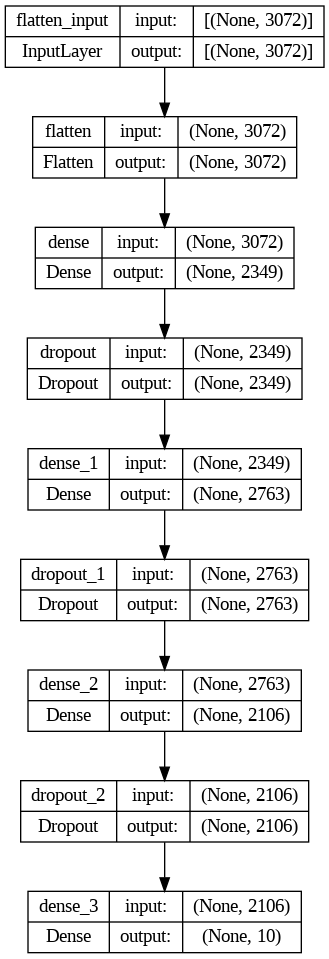

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

# 5. Implement MLP model using Keras <a class="anchor" id="6"></a>





- The implementation of MLP model in Keras comprises of three steps:-

  - Compiling the model with the compile() method.
  
  - Training the model with fit() method.
  
  - Evaluating the model performance with evaluate() method.
  
  


## 5.1 Compile the model with compile() method <a class="anchor" id="6.1"></a>


- Compilation of model can be done as follows:

In [ ]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.001)

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

### Loss function (categorical_crossentropy)

- How far the predicted tensor is from the one-hot ground truth vector is called **loss**.

- In this example, we use **categorical_crossentropy** as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction. 

- There are other loss functions in Keras, such as mean_absolute_error and binary_crossentropy. The choice of the loss function is not arbitrary but should be a criterion that the model is learning. 

- For classification by category, categorical_crossentropy or mean_squared_error is a good choice after the softmax activation layer. The binary_crossentropy loss function is normally used after the sigmoid activation layer while mean_squared_error is an option for tanh output.

### Optimization (optimizer adam)

- With optimization, the objective is to minimize the loss function. The idea is that if the loss is reduced to an acceptable level, the model has indirectly learned the function mapping input to output.

- In Keras, there are several choices for optimizers. The most commonly used optimizers are; **Stochastic Gradient Descent (SGD)**, **Adaptive Moments (Adam)** and **Root Mean Squared Propagation (RMSprop)**. 

- Each optimizer features tunable parameters like learning rate, momentum, and decay. 

- Adam and RMSprop are variations of SGD with adaptive learning rates. In the proposed classifier network, Adam is used since it has the highest test accuracy.

### Metrics (accuracy)

- Performance metrics are used to determine if a model has learned the underlying data distribution. The default metric in Keras is loss. 

- During training, validation, and testing, other metrics such as **accuracy** can also be included. 

- **Accuracy** is the percent, or fraction, of correct predictions based on ground truth.

## 5.2 Train the model with fit() method <a class="anchor" id="6.2"></a>

In [ ]:
model.fit(x_train, y_train, epochs=30, batch_size=20,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
2500/2500 - 428s - loss: 2.1179 - accuracy: 0.2197 - val_loss: 1.9128 - val_accuracy: 0.3250 - 428s/epoch - 171ms/step
Epoch 2/30
2500/2500 - 421s - loss: 1.9288 - accuracy: 0.3047 - val_loss: 1.8308 - val_accuracy: 0.3497 - 421s/epoch - 169ms/step
Epoch 3/30
2500/2500 - 373s - loss: 1.8517 - accuracy: 0.3376 - val_loss: 1.7673 - val_accuracy: 0.3741 - 373s/epoch - 149ms/step
Epoch 4/30
2500/2500 - 373s - loss: 1.7987 - accuracy: 0.3606 - val_loss: 1.7173 - val_accuracy: 0.3919 - 373s/epoch - 149ms/step
Epoch 5/30
2500/2500 - 372s - loss: 1.7617 - accuracy: 0.3751 - val_loss: 1.6791 - val_accuracy: 0.4047 - 372s/epoch - 149ms/step
Epoch 6/30
2500/2500 - 370s - loss: 1.7268 - accuracy: 0.3866 - val_loss: 1.6498 - val_accuracy: 0.4191 - 370s/epoch - 148ms/step
Epoch 7/30
2500/2500 - 377s - loss: 1.6965 - accuracy: 0.3994 - val_loss: 1.6336 - val_accuracy: 0.4227 - 377s/epoch - 151ms/step
Epoch 8/30
2500/2500 - 375s - loss: 1.6731 - accuracy: 0.4077 - val_loss: 1.6031 - val_acc

## 5.3 Evaluating model performance with evaluate() method <a class="anchor" id="6.3"></a>

In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 18s 56ms/step - loss: 1.3711 - accuracy: 0.5119

Test accuracy: 51.2%


In [ ]:
num_layers=4
max_acc=acc

## 5.4 Getting original weights <a class="anchor" id="6.3"></a>

In [ ]:
weights = model.get_weights()

In [ ]:
print(len(weights))

8


In [ ]:
for i in range(len(weights)):
  print(weights[i].shape)

(3072, 2349)
(2349,)
(2349, 2763)
(2763,)
(2763, 2106)
(2106,)
(2106, 10)
(10,)


In [ ]:
weights[1]

array([-0.02612606, -0.00128416, -0.00109426, ..., -0.02177607,
       -0.01048959,  0.00837208], dtype=float32)

In [ ]:
print(len( model.layers))

8


In [ ]:
for layers in model.layers:
  print(layers.get_weights())

In [ ]:
len(weights[1])

2349

In [ ]:
original_weights=weights

In [ ]:
original_model=model

In [ ]:
type(weights[1])

numpy.ndarray

In [ ]:
weights=original_weights

In [ ]:
weights_backup=original_weights

## 5.5 Defining scalars and changing weights of every layer by multipyling those scalars one by one

In [ ]:
scalars=[ .75, 0.8, .85, 0.9, 1.1,1.25,1.3,1.35,1.4]
new_acc=[]
acc_change=[]

In [ ]:
l1=[2*i for i in range(num_layers)]
print(len(l1))
for j in range(len(scalars)):
  for i in range(len(l1)):
    if(i==0):
      weights[l1[i]]*=scalars[j]
      k=0
      for layers in model.layers:
        if(len(layers.get_weights())>0):
          layers.set_weights([weights[k],weights[k+1]])
          k+=2
      loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
      new_acc.append(acc*100)
    elif(i!=len(l1)-1):
      weights[l1[i-1]]/=scalars[j]
      weights[l1[i]]*=scalars[j]
      k=0
      for layers in model.layers:
        if(len(layers.get_weights())>0):
          layers.set_weights([weights[k],weights[k+1]])
          k+=2
      loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
      new_acc.append(acc*100)
    else:
      weights[l1[i-1]]/=scalars[j]
      weights[l1[i]]*=scalars[j]
      k=0
      for layers in model.layers:
        if(len(layers.get_weights())>0):
          layers.set_weights([weights[k],weights[k+1]])
          k+=2
      loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
      new_acc.append(acc*100)
      weights[l1[i]]/=scalars[j]

    



4
313/313 [==============================] - 12s 39ms/step - loss: 1.4349 - accuracy: 0.5113


In [ ]:
print((new_acc))
print(len(scalars))

[50.16999840736389, 50.73999762535095, 51.15000009536743, 51.39999985694885, 50.679999589920044, 50.90000033378601, 51.20999813079834, 51.34999752044678, 50.849997997283936, 51.169997453689575, 51.249998807907104, 51.41000151634216, 51.08000040054321, 51.190000772476196, 51.35999917984009, 51.330000162124634, 51.10999941825867, 51.31000280380249, 51.169997453689575, 51.23000144958496, 50.73000192642212, 50.999999046325684, 51.20000243186951, 51.179999113082886, 50.59000253677368, 50.73000192642212, 51.179999113082886, 51.179999113082886, 50.31999945640564, 50.6600022315979, 51.0699987411499, 51.15000009536743, 50.23999810218811, 50.599998235702515, 51.02999806404114, 51.13000273704529]
9


## 5.6 Plotting graph for each layer for each scalar multiplied vs accuracy 

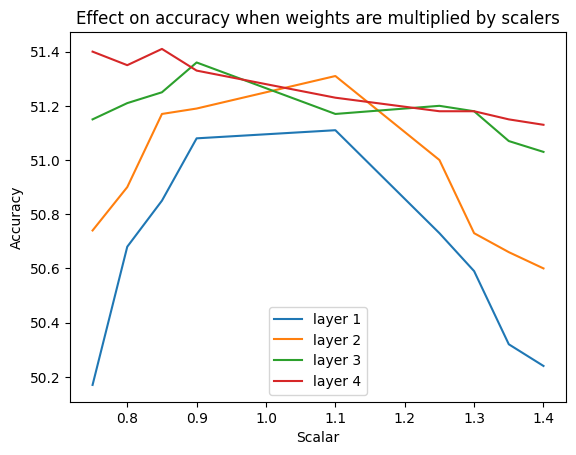

In [ ]:
new_accs=[]
for i in range(num_layers):
  l2=[]
  for j in range(len(scalars)):
    l2.append(new_acc[num_layers*j+i])
  new_accs.append(l2)
for i in range(len(new_accs)):
  plt.plot(scalars, new_accs[i], label=f'layer {i+1}')
plt.xlabel('Scalar')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are multiplied by scalers')
plt.legend()
plt.show()


## 5.7 Checking which layer is least and most sensitive to these changes and the average accuracy loss for each layers across all weights change 

In [ ]:
for i in range(num_layers):
  for j in range(len(scalars)):
    new_accs[i][j]=abs(new_accs[i][j]-max_acc*100)

In [ ]:
Average_loss_accs=[]
for i in range(num_layers):
  print(len(new_accs[i]))
  Average_loss_accs.append(sum(new_accs[i])/len(scalars))

9
9
9
9


In [ ]:
print(Average_loss_accs)

[0.5488899019029405, 0.294445620642768, 0.06777842839558919, 0.09888874159918891]


In [ ]:
print(sum(Average_loss_accs)/num_layers)

0.25250067313512164


In [ ]:
maxi=100000
mini=-10000
layer=-1
layer2=-1
for i in range(num_layers):
  if(maxi>Average_loss_accs[i]):
    maxi=Average_loss_accs[i]
    layer=i+1
  if(mini<Average_loss_accs[i]):
    mini=Average_loss_accs[i]
    layer2=i+1
print("The layer least sensitive to the changes is :" , layer)
print("The layer most sensitive to the changes is :" , layer2)

The layer least sensitive to the changes is : 3
The layer most sensitive to the changes is : 1


## 5.7 Defining scalars and changing weights of every layer by adding those scalars one by one

In [ ]:
scalars1=[0.01,0.02,0.015,0.025,0.03,0.035,0.04,0.045,0.05]
new_acc1=[]
acc_change=[]

In [ ]:
l1=[2*i for i in range(num_layers)]
print(len(l1))
for j in range(len(scalars1)):
  for i in range(len(l1)):
    if(i==0):
      weights[l1[i]]+=scalars1[j]
      k=0
      for layers in model.layers:
        if(len(layers.get_weights())>0):
          layers.set_weights([weights[k],weights[k+1]])
          k+=2
      loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
      new_acc1.append(acc*100)
    elif(i!=len(l1)-1):
      weights[l1[i-1]]-=scalars1[j]
      weights[l1[i]]+=scalars1[j]
      k=0
      for layers in model.layers:
        if(len(layers.get_weights())>0):
          layers.set_weights([weights[k],weights[k+1]])
          k+=2
      loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
      new_acc1.append(acc*100)
    else:
      weights[l1[i-1]]-=scalars1[j]
      weights[l1[i]]+=scalars1[j]
      k=0
      for layers in model.layers:
        if(len(layers.get_weights())>0):
          layers.set_weights([weights[k],weights[k+1]])
          k+=2
      loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
      new_acc1.append(acc*100)
      weights[l1[i]]-=scalars1[j]

4
313/313 [==============================] - 15s 49ms/step - loss: 30131.9004 - accuracy: 0.1000


## 5.8 Plotting graph for each layer for each scalar added vs accuracy 

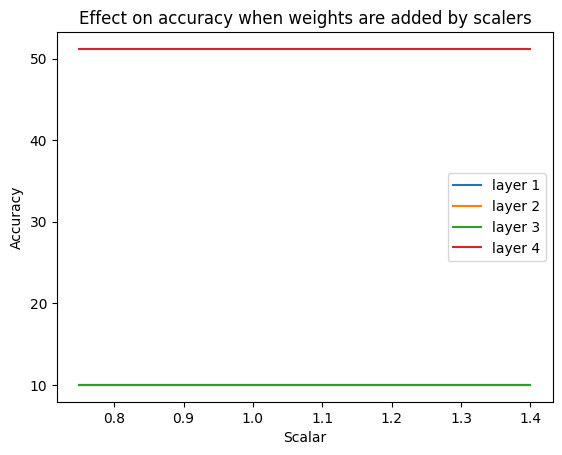

In [ ]:
new_accs1=[]
for i in range(num_layers):
  l2=[]
  for j in range(len(scalars1)):
    l2.append(new_acc1[num_layers*j+i])
  new_accs1.append(l2)
for i in range(len(new_accs1)):
  plt.plot(scalars, new_accs1[i], label=f'layer {i+1}')
plt.xlabel('Scalar')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are added by scalers')
plt.legend()
plt.show()

## 5.9 Checking which layer is least and most sensitive to these changes and the average accuracy loss for each layers across all weights change    

In [ ]:
for i in range(num_layers):
  for j in range(len(scalars)):
    new_accs1[i][j]=abs(new_accs1[i][j]-max_acc*100)

In [ ]:
Average_loss_accs=[]
for i in range(num_layers):
  print(len(new_accs1[i]))
  Average_loss_accs.append(sum(new_accs1[i])/len(scalars1))

9
9
9
9


In [ ]:
print(Average_loss_accs)
print(sum(Average_loss_accs)/num_layers)

[41.190000623464584, 41.190000623464584, 41.190000623464584, 0.0]
30.89250046759844


In [ ]:
maxi=100000
mini=-10000
layer=-1
layer2=-1
for i in range(num_layers):
  if(maxi>Average_loss_accs[i]):
    maxi=Average_loss_accs[i]
    layer=i+1
  if(mini<Average_loss_accs[i]):
    mini=Average_loss_accs[i]
    layer2=i+1
print("The layer least sensitive to the changes is :" , layer)
print("The layer most sensitive to the changes is :" , layer2)

The layer least sensitive to the changes is : 4
The layer most sensitive to the changes is : 1


## 5.10 Changing weights of by random bit flipping method
From each layer some random weights are selected and theirs bits are flipped and accuracy is claculated . Same process is done for every layer .

In [ ]:
import struct 
import random

In [ ]:
scalars2=[60,80,100,120,140]
new_acc2=[]


In [ ]:
l1=[2*i for i in range(num_layers)]
for j in range(len(scalars2)):
  accuracies=[]
  for i in range(len(l1)):
    for p in range(scalars2[j]):
      k=random.randint(0,len(weights[l1[i]])-1)
      idx=random.randint(0,len(weights[l1[i]][k])-1)
      r_weight = weights[l1[i]][k][idx]
      r_weight = format(struct.unpack('!I', struct.pack('!f', r_weight))[0], '032b')
      r_bit_index = random.randint(0,31)
      r_bit = r_weight[r_bit_index]
      
      if(r_bit == '0'):
        r_weight = r_weight[:r_bit_index] + '1' + r_weight[r_bit_index + 1:]
      if(r_bit == '1'):
        r_weight = r_weight[:r_bit_index] + '0' + r_weight[r_bit_index + 1:]
      r_weight = struct.unpack('!f',struct.pack('!I', int(r_weight, 2)))[0]
      weights[l1[i]][k][idx]=r_weight
    model.set_weights(weights)
    print("layer ", i+1)
    print("no of weights changed: ",j+1)
    loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
    print("test accuracy {}".format(acc))
    accuracies.append(acc*100)
    print("\n")
    weights=original_weights
  new_acc2.append(accuracies)
  


    

## 5.11 Plotting graph for each layer for number of weights changed vs accuracy 

In [ ]:
acc_graph=[]
for j in range(len(new_acc2[0])):
  a=[]
  for i in range(len(new_acc2)):
    a.append(new_acc2[i][j])
  acc_graph.append(a)

In [ ]:
for i in range(len(acc_graph)):
  plt.plot(scalars2, acc_graph[i], label=f'layer {i+1}')
plt.xlabel('Number of weights changed')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are changed by bit-flip')
plt.legend()
plt.show()

## 5.9 Checking which layer is least and most sensitive to these changes and the average accuracy loss for each layers across all weights change   

In [ ]:
average=[]
for i in acc_graph:
  average.append(sum(i)/len(i))
print(average)

In [ ]:
maxi=100000
mini=-10000
layer=-1
layer2=-1
for i in range(num_layers):
  if(maxi>average[i]):
    maxi=average[i]
    layer=i+1
  if(mini<average[i]):
    mini=average[i]
    layer2=i+1
print("The layer least sensitive to the changes is :" , layer)
print("The layer most sensitive to the changes is :" , layer2)